# 4주차 ML Regression 실습 과제


#[문제1]중고차 판매가격 예측하기
- 과제를 완성하여 클래스룸에 기한내에 제출합니다.
- 머신러닝 프로세스(데이터 수집 -> 데이터 전처리 -> 모델 학습 -> 모델 예측 및 평가->모델 개선)대로 실습을 진행합니다.
- 모델을 완성한 후, '6.최종 모델 분석'에서 자신의 모델을 분석한 결과를 작성합니다.


## 1.데이터 수집
- 캐글의 데이터 API를 이용하여 Vehicle dataset from cardekho 데이터를 로드하세요.(https://www.kaggle.com/nehalbirla/vehicle-dataset-from-cardekho)
- 캐글페이지에 설명되어 있는 각 컬럼이 의미하는 내용을 숙지하세요.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content/drive/My Drive/Colab Notebooks/.kaggle'

Mounted at /content/drive


- pandas의 데이터프레임 'data' 변수를 선언하여 csv 파일 형태의 데이터를  저장하세요.

In [ ]:
!kaggle datasets download -d nehalbirla/vehicle-dataset-from-cardekho

100% 292k/292k [00:00<00:00, 854kB/s]
100% 292k/292k [00:00<00:00, 853kB/s]


In [ ]:
!unzip vehicle-dataset-from-cardekho.zip

Archive:  vehicle-dataset-from-cardekho.zip
  inflating: CAR DETAILS FROM CAR DEKHO.csv  
  inflating: Car details v3.csv      
  inflating: car data.csv            
  inflating: car details v4.csv      


## 2.데이터 전처리

- data.shape, data.info(), data.describe() 등을 통하여 데이터의 형태를 확인하고 NA(None, Null, Nan) 값이 있는 열이 있는지 확인하세요.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

car_df = pd.read_csv('Car details v3.csv')
print(car_df.shape)
car_df.head(3)

(8128, 13)


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0


In [ ]:
car_df.isna().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

- value_counts()를 이용해 각 Object 타입 변수들이 가진 데이터들의 갯수를 확인하세요.

In [ ]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [ ]:
car_df['fuel'].value_counts()

Diesel    4402
Petrol    3631
CNG         57
LPG         38
Name: fuel, dtype: int64

In [ ]:
car_df['seller_type'].value_counts()

Individual          6766
Dealer              1126
Trustmark Dealer     236
Name: seller_type, dtype: int64

In [ ]:
car_df['transmission'].value_counts()

Manual       7078
Automatic    1050
Name: transmission, dtype: int64

In [ ]:
car_df['owner'].value_counts()

First Owner             5289
Second Owner            2105
Third Owner              555
Fourth & Above Owner     174
Test Drive Car             5
Name: owner, dtype: int64

In [ ]:
car_df['mileage'].value_counts()

18.9 kmpl      225
19.7 kmpl      173
18.6 kmpl      164
21.1 kmpl      157
17.0 kmpl      133
              ... 
16.34 kmpl       1
19.69 kmpl       1
20.88 km/kg      1
17.8 km/kg       1
16.51 kmpl       1
Name: mileage, Length: 393, dtype: int64

In [ ]:
car_df['engine'].value_counts()

1248 CC    1017
1197 CC     832
998 CC      453
796 CC      444
2179 CC     389
           ... 
2835 CC       1
1489 CC       1
1422 CC       1
2496 CC       1
1950 CC       1
Name: engine, Length: 121, dtype: int64

In [ ]:
car_df['max_power'].value_counts()

74 bhp       377
81.80 bhp    220
88.5 bhp     204
67 bhp       165
46.3 bhp     162
            ... 
203.2 bhp      1
175 bhp        1
57 bhp         1
80.84 bhp      1
135.1 bhp      1
Name: max_power, Length: 322, dtype: int64

In [ ]:
car_df['torque'].value_counts()

190Nm@ 2000rpm             530
200Nm@ 1750rpm             445
90Nm@ 3500rpm              405
113Nm@ 4200rpm             223
114Nm@ 4000rpm             171
                          ... 
128Nm@ 3100rpm               1
72.9Nm@ 2250rpm              1
155 Nm at 1600-2800 rpm      1
510Nm@ 1600-2800rpm          1
96  Nm at 3000  rpm          1
Name: torque, Length: 441, dtype: int64

- 'Car_Name'을 제외한 Object타입 변수의 범주형 값에 원핫인코딩(One-Hot Encoding) 변환을 적용하고, 변환된 DataFrame을 출력하세요.

In [ ]:
X_features = car_df.drop(['name'],axis=1,inplace = False)
X_features_ohe = pd.get_dummies(X_features, columns=X_features.columns)
X_features_ohe.head(3)

,year_1983,year_1991,year_1994,year_1995,year_1996,year_1997,year_1998,year_1999,year_2000,year_2001,...,torque_99Nm@ 4500rpm,seats_2.0,seats_4.0,seats_5.0,seats_6.0,seats_7.0,seats_8.0,seats_9.0,seats_10.0,seats_14.0
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


- 'Car_Name'을 제거하세요.


In [ ]:
car_df.drop(['name'],axis=1,inplace = True)

- 머신러닝 학습을 위해 피처 데이터 세트 x, 레이블 데이터 세트 y를 추출하세요.
중고차의 판매가격을 예측하는 것이 목적이므로 'Selling_Price' 컬럼을 y에 대입합니다.

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

y_target = car_df['selling_price']

- train set과 test set을 적절한 비율로 나누세요.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_features_ohe, y_target, test_size=0.3, random_state=0)

## 3.모델 학습
- LinearRegression 객체를 생성하고, 모델 학습을 수행하세요.

In [ ]:
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
pred = lr_reg.predict(X_test)

## 4.모델 예측 및 평가
- test set을 모델에 주입하여 예측 정확도를 확인하세요.

In [ ]:
def model_evaluate(y, pred):
  MSE_val = mean_squared_error(y, pred)
  RMSE_val = np.sqrt(MSE_val)
  MAE_val = mean_absolute_error(y,pred)

  print('MSE: {0:.3f}, RMSE: {1:.3F}, MAE: {2:.3F}'.format(MSE_val, RMSE_val, MAE_val))

model_evaluate(y_test, pred)

MSE: 80239206772.950, RMSE: 283265.259, MAE: 42310.461


- 학습된 모델의 회귀 계수를 확인하세요.

<Axes: >

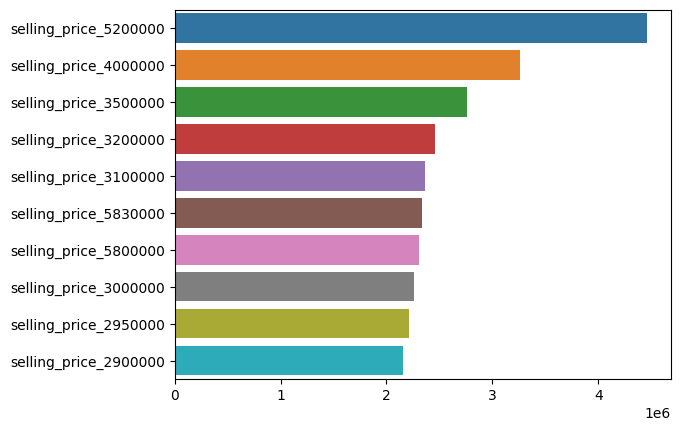

In [ ]:
coef = pd.Series(lr_reg.coef_, index=X_features_ohe.columns)
coef_sort = coef.sort_values(ascending=False)[:10]
sns.barplot(x=coef_sort.values, y=coef_sort.index)

## 5.모델 개선
- 위 모델의 문제점은? : 판매가격에 많이 의존함...
- 데이터 전처리, XGBoost 등 2가지 이상을 시도하고 타이틀을 추가하여 써주세요.

#### 5.1(데이터 전처리)


In [ ]:
X_features = car_df.drop(['selling_price'],axis=1,inplace = False)
X_features_ohe = pd.get_dummies(X_features, columns=X_features.columns)
X_features_ohe.head(3)

,year_1983,year_1991,year_1994,year_1995,year_1996,year_1997,year_1998,year_1999,year_2000,year_2001,...,torque_99Nm@ 4500rpm,seats_2.0,seats_4.0,seats_5.0,seats_6.0,seats_7.0,seats_8.0,seats_9.0,seats_10.0,seats_14.0
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_features_ohe, y_target, test_size=0.3, random_state=0)
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
pred = lr_reg.predict(X_test)

def model_evaluate(y, pred):
  MSE_val = mean_squared_error(y, pred)
  RMSE_val = np.sqrt(MSE_val)
  MAE_val = mean_absolute_error(y,pred)

  print('MSE: {0:.3f}, RMSE: {1:.3F}, MAE: {2:.3F}'.format(MSE_val, RMSE_val, MAE_val))

model_evaluate(y_test, pred)

MSE: 1827612361391274929024680815755264.000, RMSE: 42750583170189328.000, MAE: 5467653553787009.000


<Axes: >

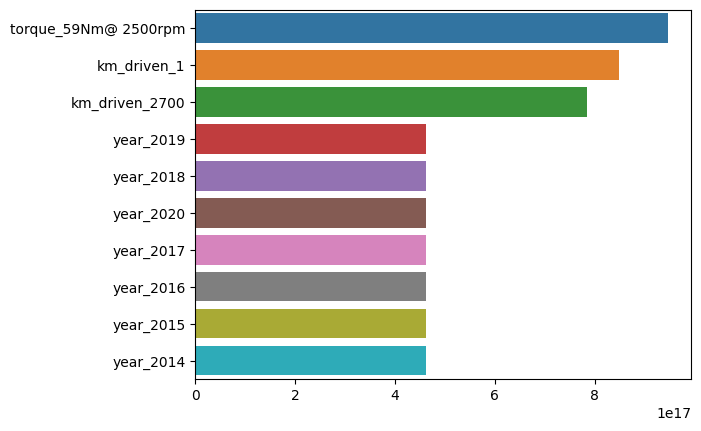

In [ ]:
coef = pd.Series(lr_reg.coef_, index=X_features_ohe.columns)
coef_sort = coef.sort_values(ascending=False)[:10]
sns.barplot(x=coef_sort.values, y=coef_sort.index)

#### 5.2(XGBoost)


In [ ]:
from xgboost import XGBRegressor
X_train, X_test, y_train, y_test = train_test_split(X_features_ohe, y_target, test_size=0.3, random_state=0)
xgb_reg = XGBRegressor()
xgb_reg.fit(X_train, y_train)
pred = xgb_reg.predict(X_test)

In [ ]:
model_evaluate(y_test,pred)

MSE: 74318484867.189, RMSE: 272614.169, MAE: 98431.798


## 6.최종 모델 분석
- 최종 모델의 문제점은? : 주행 거리가 1km 다음으로 2700km인 경우의 계수가 높은 점이 뭔가 이상한 것 같다.
- 최종 모델의 개선 가능성은? : 흠... 데이터를 스케일링하면 될 것 같기도 하다.

#[문제2]우리나라에서는 기후변화가 어떻게?기온데이터 예측하기

##1.데이터 수집

[기상자료개방포털](https://data.kma.go.kr/stcs/grnd/grndTaList.do?pgmNo=70)

- 과제와 함께 제시된 데이터를 활용하세요.
- 데이터의 출처는 아래와 같습니다.
- [기상자료개방포털] - [기후통계분석] - [기온분석] - [서울 선택]
- [자료구분] - [년] - [기간] - [1904~최근] - [csv 파일 다운로드]

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_csv('./ta_20230327095419.csv', encoding='cp949')
print(data.shape)
data.head()

(117, 4)


,년,평균기온(℃),평균최저기온(℃),평균최고기온(℃)
0,\t1907,NaN,NaN,NaN
1,\t1908,10.4,5.8,15.7
2,\t1909,10.6,5.8,16.0
3,\t1910,10.3,5.7,15.9
4,\t1911,10.6,6.0,15.9


##2.데이터 전처리

- '년' 컬럼의 '\t' 기호를 제거하고 숫자형 데이터타입으로 바꾸어 저장하세요.

In [ ]:
for i in data.index:
  try:
    data['년'][i] = int(data['년'][i].replace('\t',''))
  except:
    data.drop(i,axis=0, inplace=True)
data

<ipython-input-39-18e5709f528a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['년'][i] = int(data['년'][i].replace('\t',''))


,년,평균기온(℃),평균최저기온(℃),평균최고기온(℃)
0,1907,NaN,NaN,NaN
1,1908,10.4,5.8,15.7
2,1909,10.6,5.8,16.0
3,1910,10.3,5.7,15.9
4,1911,10.6,6.0,15.9
...,...,...,...,...
111,2018,12.9,8.8,17.9
112,2019,13.5,9.3,18.5
113,2020,13.2,9.4,17.9
114,2021,13.7,9.6,18.5


- 데이터의 형태를 확인하고 NA(None, Null, Nan) 값이 있는 열이 있는지 확인하세요.
- 결측값이 있는 년도의 특성은 무엇가?: [내용 작성]

In [ ]:
data.isna().sum()

년            0
평균기온(℃)      5
평균최저기온(℃)    5
평균최고기온(℃)    5
dtype: int64

- 컬럼에 결측값이 있는 샘플을 제거하세요.(결측값 처리를 위한 다른 방법 적용 가능)

In [ ]:
data.dropna(axis=0,inplace=True)

- 년도별 연평균최고기온의 변화 추이를 line plot을 그려 확인하세요.

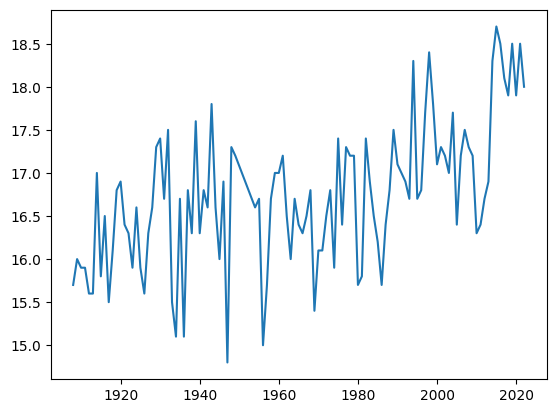

In [ ]:
plt.plot(data['년'],data['평균최고기온(℃)'])

- 학습 레이블과 학습 데이터를 생성하세요.

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor

# 학습 레이블, 학습 데이터 준비
y_train = data['평균최고기온(℃)']
X_train = np.array(data['년']).reshape(-1,1)

- 테스트 데이터를 2023년부터 2100년까지 생성하세요.

In [ ]:
# 테스트 데이터 준비
X_test = np.arange(2023, 2100).reshape(-1, 1)

##3.모델 학습

- 회귀 모델을 정의하고 학습 데이터를 기반으로 학습을 진행하세요.

In [ ]:
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
pred = lr_reg.predict(X_test)

## 4.모델 예측 및 평가


- 학습 데이터와 테스트 데이터를 합치고, 1900년대부터 2100년까지 기온 변화 추이를 line plot으로 그리세요.

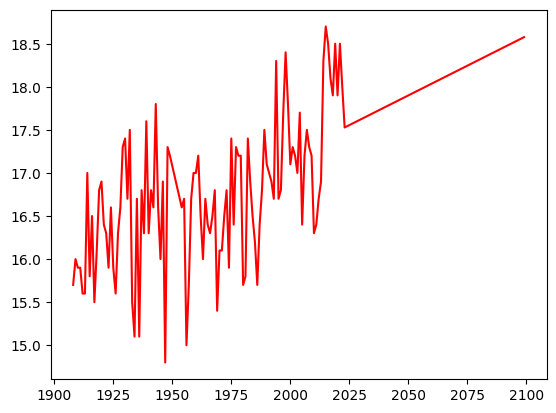

In [ ]:
#예시
X = np.concatenate((X_train, X_test), axis=0)
y = np.concatenate((y_train, pred), axis=0)
plt.plot(X, y, color='r')

- 2020년과 2100년에 예측한 연평균 기온은 몇도가 차이나는지 구하세요.

In [ ]:
y[-1]-y[-81]

0.0761580073576944

- 학습된 모델의 회귀 계수를 확인하세요.

In [ ]:
lr_reg.coef_

array([0.01379579])

## 5.모델 개선

- 1970년을 기점으로 우리나라에는 급격한 산업화가 찾아왔습니다. 1970년~현재까지의 데이터를 바탕으로 학습한 회귀 모델을 구현하세요.


In [ ]:
y_train1 = data.loc[63:, '평균최고기온(℃)']
X_train1 = np.array(data.loc[63:, '년']).reshape(-1, 1)

lr_reg2 = LinearRegression()
lr_reg2.fit(X_train1, y_train1)
pred = lr_reg2.predict(X_test)

- 학습 데이터와 테스트 데이터를 합치고, 1970년대부터 2100년까지 기온 변화 추이를 line plot으로 그리세요.

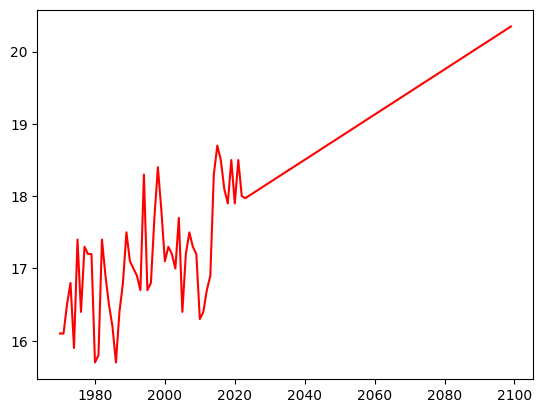

In [ ]:
X = np.concatenate((X_train1, X_test), axis=0)
y = np.concatenate((y_train1, pred), axis=0)
plt.plot(X, y, color='r')

- 개선된 모델을 이용하여 2020년과 2100년에 예측한 연평균 기온은 몇도가 차이나는지 구하세요.

In [ ]:
y[-1]-y[-81]

1.8473633284954047

- 학습된 모델의 회귀 계수를 확인하세요. 1900년대부터 학습시켰을 때와 기울기가 얼마나 차이나는지 비교하세요.

In [ ]:
lr_reg2.coef_

array([0.03125302])

- 이 경우와 같이 미래를 예측하는 모델은 평가를 어떻게 하면 좋을지 의견을 작성하세요: 주위 상황을 인식하고 큰 변화가 있는 것 같은 경우는 데이터를 분할해서 각각의 상황에서 선형회귀를 하여 전체적인 흐름은 꺾은 선 그래프와 같은 형태로 보면 좋을 것 같다.

#[스스로 정리하기]
- 두 가지 문제를 해결하며 배운 점을 스스로 정리하세요.

첫번째 과제는 데이터 값에 object 형태의 값이 많을 때 처리하는데 어려움을 느낄 수 있었다. 데이터 가공하는 방법을 더 공부해야겠다고 생각했다. 또한, 두번째 과제에서는 선형회귀 구간에 따라서 결과가 어떻게 달라지는지 알 수 있었다. 따라서 선형회귀에 있어서는 데이터 가공 뿐만이 아니라 범위 설정도 중요한 역할을 한다는 점을 알 수 있었다.